In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from utils import *

pd.set_option('display.max_rows', 100)
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
# File loading
df = pd.read_excel(r'..\..\Data\Sales Reps and Geographies.xlsx', 'Sheet1')
df.name = 'SalesRepsandGeographies'

In [3]:
# Dataframe head
df.head()

,Cust Sold To Nbr,P-08,Region Sales Rep,Region Geography
0,0028502952,Clinipak Transport Bag,Rene-Philippe Callebaut,France
1,0028502952,Closed Suction KIMVENT Adult Acc Saline,Emilie Carrere,France
2,0028502952,ExamGlove Nitrile XTRA Purple NonSterile,Rene-Philippe Callebaut,France
3,0028502952,H100 Surgical Drapes Cardiology S,Rene-Philippe Callebaut,France
4,0028502952,H200 Surg Access Instrument Protector S,Rene-Philippe Callebaut,France


In [4]:
# Dataframe shape
df_shape = df.shape
print("This dataframe has %d columns and %d rows." % (df_shape[1], df_shape[0]))

This dataframe has 4 columns and 44653 rows.


In [5]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44653 entries, 0 to 44652
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cust Sold To Nbr  44653 non-null  object
 1   P-08              44653 non-null  object
 2   Region Sales Rep  44653 non-null  object
 3   Region Geography  44653 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [6]:
# Categorical features modalities
modalities_table(df)

,Modalities
Region Geography,33
Region Sales Rep,94
P-08,606
Cust Sold To Nbr,6080


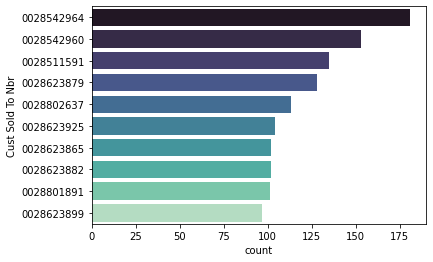

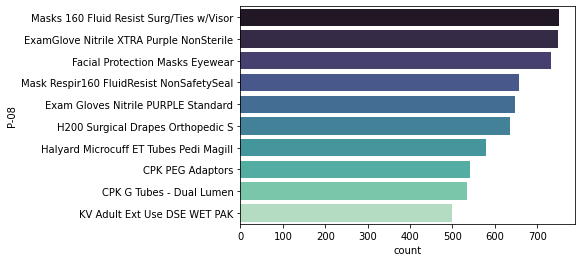

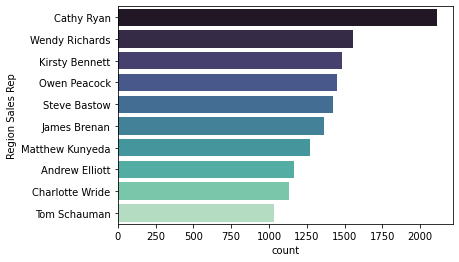

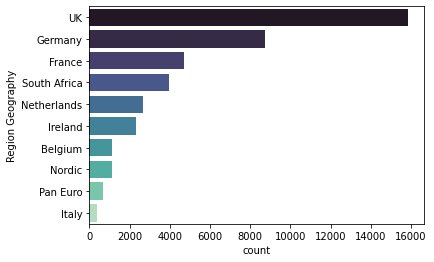

In [7]:
# Distribution of categorical columns        
plot_cat_dist(df)

In [8]:
# Missing values are represented by "-"
df[df.eq('-').any(1)]

,Cust Sold To Nbr,P-08,Region Sales Rep,Region Geography
8318,0028523556,MXR ENTRAL w/o Stylet - ENFit NG Tube,-,Netherlands
8319,0028523556,MXR MAXTER Misc Straws,-,Netherlands
11251,0028545895,Incisional Pump Kits Fixed Flow 270ml,-,Pan Euro
22675,0028623884,Incisional Pump Kits Fixed Flow 270ml,-,Czech Republic
23247,0028623910,Incisional Pump Kits Fixed Flow 270ml,-,Poland
23432,0028623921,Incisional Pump Kits Fixed Flow 270ml,-,CE Other
29709,0028803632,Facial Protection Masks Eyewear,-,-
29710,0028803632,Masks 160 Fluid Resist Surg/Ties,-,-
29711,0028803632,Masks 160 Fluid Resist Surg/Ties w/Visor,-,-
29712,0028803632,SEQUENTIAL H300 Sterilization Wrap,-,-


In [9]:
# Replacing missing values with None
df.replace({'-': None},inplace=True)
df[df.isnull().any(axis=1)]

,Cust Sold To Nbr,P-08,Region Sales Rep,Region Geography
8318,0028523556,MXR ENTRAL w/o Stylet - ENFit NG Tube,None,Netherlands
8319,0028523556,MXR MAXTER Misc Straws,None,Netherlands
11251,0028545895,Incisional Pump Kits Fixed Flow 270ml,None,Pan Euro
22675,0028623884,Incisional Pump Kits Fixed Flow 270ml,None,Czech Republic
23247,0028623910,Incisional Pump Kits Fixed Flow 270ml,None,Poland
23432,0028623921,Incisional Pump Kits Fixed Flow 270ml,None,CE Other
29709,0028803632,Facial Protection Masks Eyewear,None,None
29710,0028803632,Masks 160 Fluid Resist Surg/Ties,None,None
29711,0028803632,Masks 160 Fluid Resist Surg/Ties w/Visor,None,None
29712,0028803632,SEQUENTIAL H300 Sterilization Wrap,None,None


In [10]:
# Missing value summary
missing_values_table(df)

Your selected dataframe has 4 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Region Sales Rep,28,0.06
Region Geography,14,0.03


In [11]:
# Missing values export
save_missing_values_table(df, df.name)

In [12]:
# Categorical features modalities
modalities_table(df, True)

,Modalities
Region Geography,32
Region Sales Rep,93
P-08,606
Cust Sold To Nbr,6080


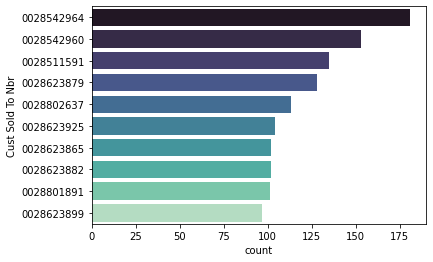

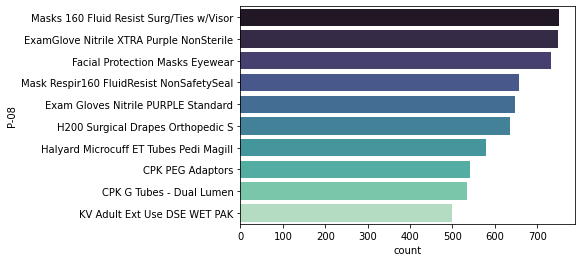

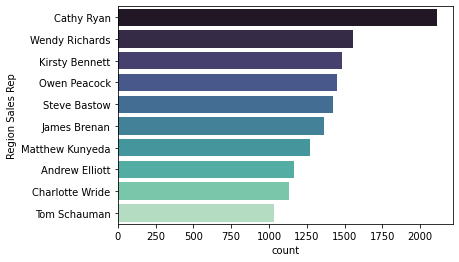

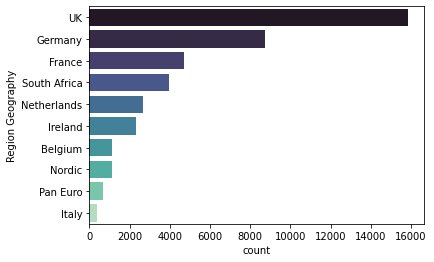

In [13]:
# Distribution of categorical columns        
plot_cat_dist(df)

In [14]:
# Countries in table
countries = sorted(list(set(df['Region Geography'].dropna())))
df_countries = pd.DataFrame(countries, columns=['Region Geography'])
df_countries

,Region Geography
0,Africa Other
1,Alternate Care
2,Austria
3,Belgium
4,CE Other
5,CIS
6,Cyprus
7,Czech Republic
8,EE Other
9,France


**UK** should be changed to **United Kingdom** to be joined with other tables.

In [15]:
df_expl = df_countries.iloc[[1,4,5,8,12, 18,20,24,30]]
df_expl

,Region Geography
1,Alternate Care
4,CE Other
5,CIS
8,EE Other
12,House
18,Nordic
20,Pan Euro
24,Saudi & Other
30,UAE & Other


In [16]:
# Save data that needs explanation
save_values_table(df_expl, 'SalesRepsandGeographies_Region')

In [17]:
# Region Sales Rep in table
salesrep = sorted(list(set(df['Region Sales Rep'].dropna())))
df_salesrep = pd.DataFrame(salesrep, columns=['Region Sales Rep'])
df_salesrep

,Region Sales Rep
0,Abdelkader Drouiche
1,Agent Ouest
2,Alexandra Van Oost
3,Allenco Med
4,Andrew Elliott
5,Anke Hermsen
6,Anna Crossman
7,Anne-Marie Radermacher
8,Arjen Neggers
9,Asif Khan


In [18]:
df_salesrep_expl = df_salesrep.iloc[[1, 22,51,55,56,57,58,73,74,87,88]]
df_salesrep_expl

,Region Sales Rep
1,Agent Ouest
22,Community
51,NSM S&IP UK
55,OpRHFR01
56,OpenDE04
57,OpenSIPDE01
58,OpenSIPDE02
73,Sekhu L
74,Sekhu L (NW)
87,Van Wyng C (Eastern Cape)


In [19]:
# Save data that needs explanation
save_values_table(df_salesrep_expl, 'SalesRepsandGeographies_SalesRep')

In [20]:
cust = sorted(list(set(df['Cust Sold To Nbr'])))
df_cust = pd.DataFrame(cust, columns=['Cust Sold To Nbr'])
df_cust_expl = df_cust.tail()
df_cust_expl

,Cust Sold To Nbr
6075,0080274774
6076,0080274775
6077,EKC0008
6078,EKC0310
6079,EKC0786


In [21]:
# Save data that needs explanation
save_values_table(df_cust_expl, 'SalesRepsandGeographies_CustNum')

In [22]:
for c in df.select_dtypes(['object']).columns:
    print(c + ' VARCHAR(%d),' % max(df[c].str.len()))

Cust Sold To Nbr VARCHAR(10),
P-08 VARCHAR(40),
Region Sales Rep VARCHAR(25),
Region Geography VARCHAR(14),


## The salesrep dimension should be in this schema :
<br/>
[ID] [int] IDENTITY(1,1) NOT NULL,<br/>
[salesrep] [varchar](25) NULL,<br/>
[customer_ID] [int] NOT NULL,<br/>
[product_ID] [int] NOT NULL,<br/>
[salesmanager_ID] [int] NOT NULL,<br/>
[country_ID] [int] NOT NULL ##VARCHAR(25)